In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



Variables

In [2]:
omega_one=[]
omega_two=[]
test_class_one=[]
test_class_two=[]
matched=0

**Upload And path setup**

In [3]:
train_df=pd.read_csv("/content/train.txt",sep=" " ,names=["x1","x2","Y"])
test_df=pd.read_csv("/content/test.txt",sep=" " ,names=["x1","x2","Y"])




**Traning Data Separation**

In [4]:
def class_separation(df):
  for i in range(0,len(df)):
    li=[]
    if df['Y'][i]==1:
      li=df['x1'][i],df['x2'][i]
      omega_one.append(li)
    elif df['Y'][i]==2: 
      li=df['x1'][i],df['x2'][i] 
      omega_two.append(li) 



**Mean Calculation**

In [5]:
def weight_cal(omega):
  temp_li=[]
  temp_li2=[]
  for i in range(0,len(omega)):
    temp_li.append(omega[i][0])
    temp_li2.append(omega[i][1])

  w1_omega=sum(temp_li)/len(temp_li)
  w2_omega=sum(temp_li2)/len(temp_li2)

  w_f=np.array([w1_omega,w2_omega])
  return w_f



**Test Data Class**

In [6]:
def belongs(x):
  temp_1=np.dot(np.transpose(w1_f),x)-(.5)*(np.dot(np.transpose(w1_f),w1_f))
  temp_2=np.dot(np.transpose(w2_f),x)-(.5)*(np.dot(np.transpose(w2_f),w2_f))
  if temp_1>temp_2:
    return 1
  else:
    return 2  


**Desicion Boundary Line Points**

In [7]:
def line_points(min_f,max_f,cons):
  li=[]
  li2=[]
  for i in range(min_f,max_f):
    
    i_f=np.array(i)
    y=-1*((np.dot(cof1,i_f)+cons)/cof2)
    li.append(y)
    li2.append(i)
    i=i+1

 
  return li2,li  

In [8]:
class_separation(train_df)
w1_f=weight_cal(omega_one)
w2_f=weight_cal(omega_two)




In [9]:
for i in test_df.index: 
     li=[]
     x=np.array([test_df['x1'][i],test_df['x2'][i]])
     li=[test_df['x1'][i],test_df['x2'][i]]
     temp_f=belongs(x)
     if temp_f==test_df['Y'][i]:
       print("matched")
       matched=matched+1
       if test_df['Y'][i]==1:
        test_class_one.append(li)
       elif test_df['Y'][i]==2:
         test_class_two.append(li)

     else:
       print("not matched")  
       

matched
matched
matched
matched
matched
not matched
matched


In [10]:
max_train_x1= max(train_df['x1'])
max_train_x2= max(train_df['x2'])
max_test_x1= max(test_df['x1'])
max_test_x2= max(test_df['x2'])
min_train_x1= min(train_df['x1'])
min_train_x2= min(train_df['x2'])
min_test_x1= min(test_df['x1'])
min_test_x2= min(test_df['x2'])

max_f=max(max_train_x1,max_train_x2,max_test_x1,max_test_x2)
min_f=min(min_train_x1,min_train_x2,min_test_x1,min_test_x2)

cons=-.5*(np.dot(np.transpose(w1_f),w1_f)-np.dot(np.transpose(w2_f),w2_f))
w=np.transpose(w1_f)-np.transpose(w2_f)
cof1=w[0]
cof2=w[1]



In [11]:
line_x,line_y=line_points(min_f,max_f,cons)


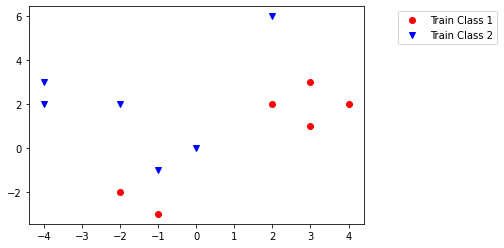

In [12]:
plt.plot(*zip(*omega_one),'ro',label="Train Class 1")
plt.plot(*zip(*omega_two),"bv",label="Train Class 2")
plt.legend(loc="upper center",bbox_to_anchor=(1.25, 1))
plt.show()

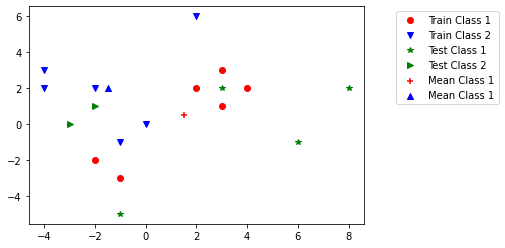

In [13]:
plt.plot(*zip(*omega_one),'ro',label="Train Class 1")
plt.plot(*zip(*omega_two),"bv",label="Train Class 2")
plt.scatter(w1_f[0],w1_f[1],marker='+',c='red',label="Mean Class 1")
plt.scatter(w2_f[0],w2_f[1],marker='^',c='blue',label="Mean Class 1")
plt.plot(*zip(*test_class_one),'g*',label="Test Class 1")
plt.plot(*zip(*test_class_two),"g>",label="Test Class 2")
plt.legend(loc="upper center",bbox_to_anchor=(1.25, 1))
plt.show()

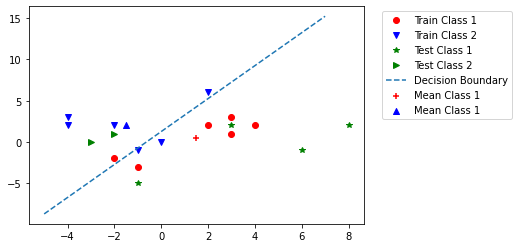

In [14]:
plt.plot(*zip(*omega_one),'ro',label="Train Class 1")
plt.plot(*zip(*omega_two),"bv",label="Train Class 2")
plt.scatter(w1_f[0],w1_f[1],marker='+',c='red',label="Mean Class 1")
plt.scatter(w2_f[0],w2_f[1],marker='^',c='blue',label="Mean Class 1")
plt.plot(*zip(*test_class_one),'g*',label="Test Class 1")
plt.plot(*zip(*test_class_two),"g>",label="Test Class 2")
plt.plot(line_x,line_y,"--",label="Decision Boundary")
plt.legend(loc="upper center",bbox_to_anchor=(1.25, 1))
plt.show()

In [15]:
print("Accuracy {}".format((matched/len(test_df)*100)))

Accuracy 85.71428571428571
